<a href="https://colab.research.google.com/github/G-Shillcock/Division_of_Labour/blob/main/Filling_Indents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install alphashape
!pip install descartes

100%|██████████| 630/630 [00:00<00:00, 22934.61it/s]


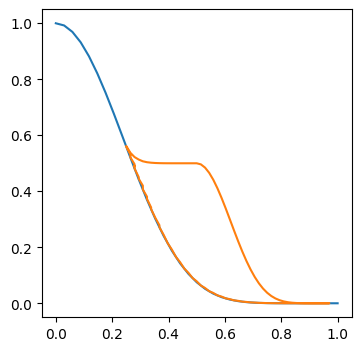

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
from tqdm import tqdm
import math
import alphashape

def calc_set_average(n, d=25, α=20, a=.5, b=9):

    points = set()
    t = np.linspace(0,1,d)**2

    plt.figure(figsize=(4, 4))
    plt.plot(t**a, (1-t)**b)

    for ts in tqdm(it.combinations_with_replacement(t, n),total=math.comb(d+n-1,n)):

        if len(set(ts))==1:
            pass
        else:
            ts = np.array(ts)

            xs = ts**a
            ys = (1-ts)**b

            x_avg = sum(xs)/len(xs)
            y_avg = sum(ys)/len(ys)

            if y_avg >= (1-x_avg**(1/a))**b:
                points.add((x_avg, y_avg))

    points = list(points)

    alpha_shape = alphashape.alphashape(points, α)

    plt.plot(*alpha_shape.exterior.xy)
    plt.savefig(f'minkowski_average_{n}.svg')
    plt.show()

calc_set_average(2,35,30)
